## Exploration of The Training Data

In [43]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
import json
import glob 
import tensorflow as tf

from PIL import Image

#### Loading and Exploring <i>**annotation**<i/> data

In [44]:
## Loading the train image annotations
## this file is a json file

annotations_json = json.load(open('Data/train/inaturalist_2017_to_iwildcam_train.json')) 

In [45]:
## json is a dict type
## these are the keys; we can conver this into a DataFrame
annotations_json.keys()

dict_keys(['info', 'images', 'licenses', 'annotations', 'categories'])

In [46]:
annotations_json['images'][0]

{'license': 3,
 'file_name': 'inaturalist_2017/Mammalia/Papio anubis/df40033fdbde031e98f27e822e7dce29.jpg',
 'rights_holder': 'blaircostelloe',
 'height': 533,
 'width': 800,
 'id': 94343}

In [47]:
annotations_json['annotations'][0]

{'image_id': 94343, 'category_id': 78, 'id': 94343}

In [48]:
annotations_json['info'] ## I don't need this information

{'description': 'Beta version of the 2017 FGVC^4 iNaturalist Competition dataset.',
 'url': 'https://github.com/visipedia/inat_comp',
 'version': '0.5',
 'year': 2017,
 'contributor': 'iNaturalist Competition group',
 'date_created': '2017-03-27 13:51:52.328354'}

In [49]:
annotations_json['categories']

[{'supercategory': 'Aves', 'id': 570, 'name': 'Aramus guarauna'},
 {'supercategory': 'Aves', 'id': 130, 'name': 'Ardeotis kori'},
 {'supercategory': 'Aves', 'id': 120, 'name': 'Struthio camelus'},
 {'supercategory': 'Mammalia', 'id': 377, 'name': 'Procyon lotor'},
 {'supercategory': 'Mammalia', 'id': 240, 'name': 'Nasua narica'},
 {'supercategory': 'Aves', 'id': 372, 'name': 'Meleagris ocellata'},
 {'supercategory': 'Mammalia', 'id': 6, 'name': 'Puma concolor'},
 {'supercategory': 'Mammalia', 'id': 108, 'name': 'Canis mesomelas'},
 {'supercategory': 'Mammalia', 'id': 564, 'name': 'Canis latrans'},
 {'supercategory': 'Mammalia', 'id': 78, 'name': 'Papio anubis'},
 {'supercategory': 'Mammalia', 'id': 8, 'name': 'Pecari tajacu'},
 {'supercategory': 'Mammalia', 'id': 268, 'name': 'Hippopotamus amphibius'},
 {'supercategory': 'Mammalia', 'id': 378, 'name': 'Odocoileus virginianus'},
 {'supercategory': 'Mammalia', 'id': 102, 'name': 'Kobus ellipsiprymnus'},
 {'supercategory': 'Reptilia', 'id

In [50]:
len(annotations_json['images'])

7655

In [51]:
len(annotations_json['annotations'])

7655

In [52]:
len(annotations_json['categories'])

42

#### Splitting JSON file into three seperate dataframes

I cannot add annotations to the dataframe because the dimensions don't match
Later on I can maybe map the categories with the animals 

In [53]:
train_images = pd.DataFrame(annotations_json['images'])
train_annotations = pd.DataFrame(annotations_json['annotations'])
train_categories = pd.DataFrame(annotations_json['categories'])

#### Exloring the three different dataframes

In [54]:
train_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   supercategory  42 non-null     object
 1   id             42 non-null     int64 
 2   name           42 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [55]:
train_categories[train_categories['supercategory'] == 'Aves']

supercategory   id                     name
0           Aves  570          Aramus guarauna
1           Aves  130            Ardeotis kori
2           Aves  120         Struthio camelus
5           Aves  372       Meleagris ocellata
17          Aves  374               Crax rubra
18          Aves  245    Penelope purpurascens
19          Aves  385           Ortalis vetula
28          Aves  563      Tigrisoma mexicanum
30          Aves  657       Catharus ustulatus
32          Aves  568        Aramides cajaneus
33          Aves   41  Cochlearius cochlearius
41          Aves  322          Motacilla flava

In [56]:
train_categories.head()

supercategory   id              name
0          Aves  570   Aramus guarauna
1          Aves  130     Ardeotis kori
2          Aves  120  Struthio camelus
3      Mammalia  377     Procyon lotor
4      Mammalia  240      Nasua narica

In [57]:
train_categories.tail()

supercategory   id                      name
37      Mammalia  371  Urocyon cinereoargenteus
38      Mammalia  112    Giraffa camelopardalis
39      Mammalia  310       Macaca fascicularis
40      Mammalia   96        Aepyceros melampus
41          Aves  322           Motacilla flava

I'm thinking maybe it's a good idea to sort the categories numerically from least to greatest?

In [58]:
## There are 7,655 images in this set
train_annotations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7655 entries, 0 to 7654
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   image_id     7655 non-null   int64
 1   category_id  7655 non-null   int64
 2   id           7655 non-null   int64
dtypes: int64(3)
memory usage: 179.5 KB


In [59]:
train_annotations.head()

image_id  category_id     id
0     94343           78  94343
1     94344           78  94344
2     94345           78  94345
3     94347           78  94347
4     94348           78  94348

In [60]:
train_annotations.tail()

image_id  category_id      id
7650    665476          570  665476
7651    665477          570  665477
7652    665479          570  665479
7653    665480          570  665480
7654    665481          570  665481

In [61]:
train_annotations.head()

image_id  category_id     id
0     94343           78  94343
1     94344           78  94344
2     94345           78  94345
3     94347           78  94347
4     94348           78  94348

In [62]:
train_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7655 entries, 0 to 7654
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   license        7655 non-null   int64 
 1   file_name      7655 non-null   object
 2   rights_holder  7655 non-null   object
 3   height         7655 non-null   int64 
 4   width          7655 non-null   int64 
 5   id             7655 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 359.0+ KB


In [63]:
train_images.head()

license                                          file_name   rights_holder  \
0        3  inaturalist_2017/Mammalia/Papio anubis/df40033...  blaircostelloe   
1        3  inaturalist_2017/Mammalia/Papio anubis/3b3aa62...  blaircostelloe   
2        3  inaturalist_2017/Mammalia/Papio anubis/8ae2d15...  blaircostelloe   
3        3  inaturalist_2017/Mammalia/Papio anubis/9e58e4f...  blaircostelloe   
4        3  inaturalist_2017/Mammalia/Papio anubis/5a19154...    Martin Grimm   

   height  width     id  
0     533    800  94343  
1     533    800  94344  
2     601    800  94345  
3     533    800  94347  
4     533    800  94348

In [64]:
train_images.tail()

license                                          file_name  \
7650        3  inaturalist_2017/Aves/Aramus guarauna/8f21eeeb...   
7651        3  inaturalist_2017/Aves/Aramus guarauna/e74852d0...   
7652        5  inaturalist_2017/Aves/Aramus guarauna/394d3822...   
7653        3  inaturalist_2017/Aves/Aramus guarauna/23893b27...   
7654        3  inaturalist_2017/Aves/Aramus guarauna/c0f9d1e5...   

                rights_holder  height  width      id  
7650          Nicolas Olejnik     532    800  665476  
7651             Nolan Eggert     535    800  665477  
7652  Gonzalo Zepeda Martínez     800    611  665479  
7653            Johnny Wilson     600    800  665480  
7654           Luis Guillermo     452    800  665481

In [65]:
## dropping columns that are not relevent to what I'm looking at
train_images.drop(columns=['license', 'rights_holder'], inplace=True)

In [66]:
## checking to see if the amount of images matches up with the train_images
train_annotations['image_id'].nunique()

7655

In [67]:
## checking to see if there are any duplicate images / how many unique images in the train_images DF
train_images['file_name'].nunique()

7655

In [68]:
## checking to see what the class counts look like
train_annotations['category_id'].value_counts()

378    2145
377    1476
564    1311
14      406
371     364
240     191
8       149
657     137
570     118
385     115
90      104
563      90
6        71
111      71
268      58
96       46
110      44
114      42
322      39
568      39
3        39
112      38
103      37
122      36
374      35
41       35
120      35
24       33
267      33
166      32
310      31
104      31
245      31
242      28
78       27
72       24
108      23
102      21
296      20
130      20
372      16
83       14
Name: category_id, dtype: int64

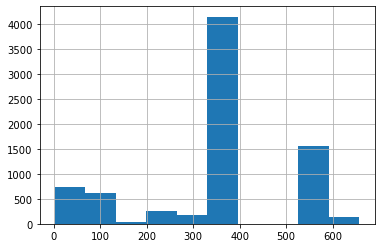

In [69]:
## visulizing what the class balance looks like
## very unbalanced 

train_annotations['category_id'].hist();

In [70]:
max_width = max(train_images['width'])
print(f'The max width of an image is: {max_width}')

The max width of an image is: 800


In [71]:
min_width = min(train_images['width'])
print(f'The min width of an image is: {min_width}')

The min width of an image is: 259


In [72]:
max_height = max(train_images['height'])
print(f'The max height of an image is: {max_height}')

The max height of an image is: 800


In [73]:
min_height = min(train_images['height'])
print(f'The min height of an image is: {min_height}')

The min height of an image is: 150


### Visualizing Images

##### Creating a Path for Images

In [74]:
import glob
import os

In [75]:
TRAIN_PATH = 'Data/train/images_complete/'

In [76]:
train_jpg = glob.glob(TRAIN_PATH + '*.jpg', recursive=True)

print('number of images in the training set:', len(train_jpg))

number of images in the training set: 7655


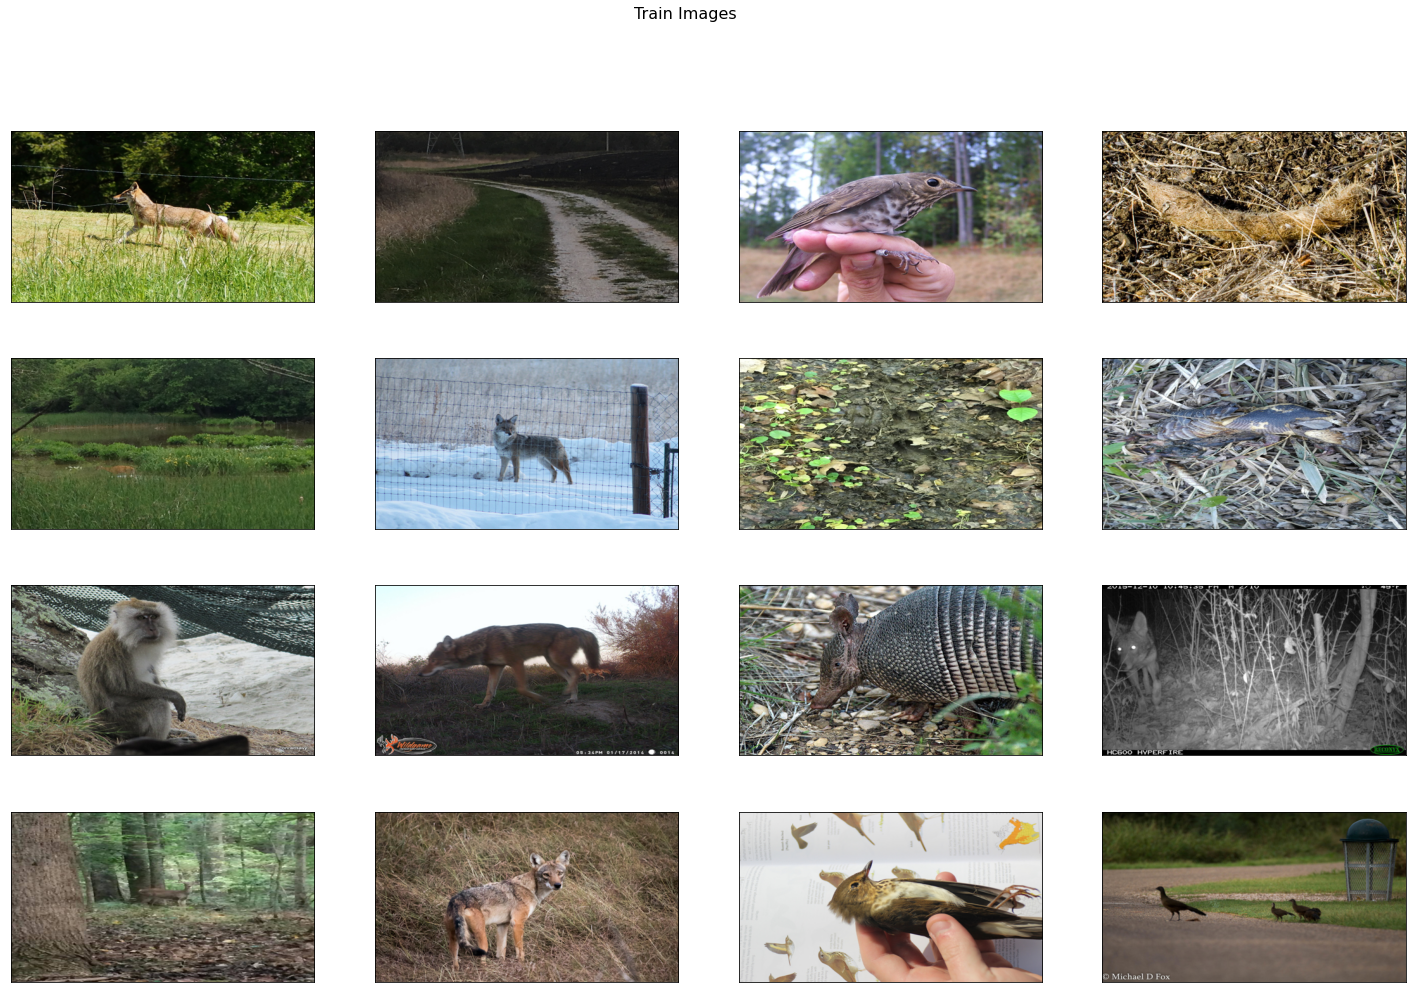

In [77]:
## function to visulize images in dataset using pillow
## Visualizing random images from the training set
## code written by NAYU T.S

fig = plt.figure(figsize=(25, 16))
for i,im_path in enumerate(train_jpg[:16]):
    ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    im = Image.open(im_path)
    im = im.resize((480,270))
    plt.suptitle('Train Images', fontsize=16)
    plt.imshow(im)

In [78]:
## converting train_jpg into a dataframe
jpg_images = pd.DataFrame(train_jpg, columns = ['file_name'])

In [79]:
jpg_images.head()

file_name
0  Data/train/images_complete/9dbd2dbff72497d20c8...
1  Data/train/images_complete/fb94775e164e3c9d45e...
2  Data/train/images_complete/b9a114e2dc0b5fa6766...
3  Data/train/images_complete/3fc247cd745cec28380...
4  Data/train/images_complete/5926700c7d0960ae51e...

### Merging together dataframes to create one large dataframe with all of the information I need

I will create one data frame that has information from annotations df
The train_categories information just contains the species name associated with the category id. I don't think I need to include that right now

In [80]:
train_annotations.head()

image_id  category_id     id
0     94343           78  94343
1     94344           78  94344
2     94345           78  94345
3     94347           78  94347
4     94348           78  94348

In [81]:
train_annotations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7655 entries, 0 to 7654
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   image_id     7655 non-null   int64
 1   category_id  7655 non-null   int64
 2   id           7655 non-null   int64
dtypes: int64(3)
memory usage: 179.5 KB


In [82]:
train_images.head()

file_name  height  width     id
0  inaturalist_2017/Mammalia/Papio anubis/df40033...     533    800  94343
1  inaturalist_2017/Mammalia/Papio anubis/3b3aa62...     533    800  94344
2  inaturalist_2017/Mammalia/Papio anubis/8ae2d15...     601    800  94345
3  inaturalist_2017/Mammalia/Papio anubis/9e58e4f...     533    800  94347
4  inaturalist_2017/Mammalia/Papio anubis/5a19154...     533    800  94348

In [83]:
train_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7655 entries, 0 to 7654
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7655 non-null   object
 1   height     7655 non-null   int64 
 2   width      7655 non-null   int64 
 3   id         7655 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 239.3+ KB


In [84]:
train_images = train_images.merge(train_annotations, on= 'id', how='left' )

In [85]:
train_images.head()

file_name  height  width     id  \
0  inaturalist_2017/Mammalia/Papio anubis/df40033...     533    800  94343   
1  inaturalist_2017/Mammalia/Papio anubis/3b3aa62...     533    800  94344   
2  inaturalist_2017/Mammalia/Papio anubis/8ae2d15...     601    800  94345   
3  inaturalist_2017/Mammalia/Papio anubis/9e58e4f...     533    800  94347   
4  inaturalist_2017/Mammalia/Papio anubis/5a19154...     533    800  94348   

   image_id  category_id  
0     94343           78  
1     94344           78  
2     94345           78  
3     94347           78  
4     94348           78

In [86]:
train_images.tail()

file_name  height  width  \
7650  inaturalist_2017/Aves/Aramus guarauna/8f21eeeb...     532    800   
7651  inaturalist_2017/Aves/Aramus guarauna/e74852d0...     535    800   
7652  inaturalist_2017/Aves/Aramus guarauna/394d3822...     800    611   
7653  inaturalist_2017/Aves/Aramus guarauna/23893b27...     600    800   
7654  inaturalist_2017/Aves/Aramus guarauna/c0f9d1e5...     452    800   

          id  image_id  category_id  
7650  665476    665476          570  
7651  665477    665477          570  
7652  665479    665479          570  
7653  665480    665480          570  
7654  665481    665481          570

In [87]:
#### Trying to figure out how to strip file_name to just the ID name 
### the copy df has all of the information I need

In [88]:
train_images_copy = train_images.copy()

In [89]:
jpg_images_copy = jpg_images.copy()

In [90]:
train_images_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7655 entries, 0 to 7654
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   file_name    7655 non-null   object
 1   height       7655 non-null   int64 
 2   width        7655 non-null   int64 
 3   id           7655 non-null   int64 
 4   image_id     7655 non-null   int64 
 5   category_id  7655 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 418.6+ KB


In [91]:
train_images_copy.head()

file_name  height  width     id  \
0  inaturalist_2017/Mammalia/Papio anubis/df40033...     533    800  94343   
1  inaturalist_2017/Mammalia/Papio anubis/3b3aa62...     533    800  94344   
2  inaturalist_2017/Mammalia/Papio anubis/8ae2d15...     601    800  94345   
3  inaturalist_2017/Mammalia/Papio anubis/9e58e4f...     533    800  94347   
4  inaturalist_2017/Mammalia/Papio anubis/5a19154...     533    800  94348   

   image_id  category_id  
0     94343           78  
1     94344           78  
2     94345           78  
3     94347           78  
4     94348           78

In [92]:
## stripping the text before the actual file_name
## using lstrip removes leading characters. 

train_images_copy['file_name'] = train_images_copy['file_name'].map(lambda x: x.lstrip('inaturalist_2017'))

In [93]:
train_images_copy.head()

file_name  height  width     id  \
0  /Mammalia/Papio anubis/df40033fdbde031e98f27e8...     533    800  94343   
1  /Mammalia/Papio anubis/3b3aa628646e40625c7a92a...     533    800  94344   
2  /Mammalia/Papio anubis/8ae2d1514a6e2154a60aef5...     601    800  94345   
3  /Mammalia/Papio anubis/9e58e4f36d81880e2945b00...     533    800  94347   
4  /Mammalia/Papio anubis/5a191548f8357c2579ae0b5...     533    800  94348   

   image_id  category_id  
0     94343           78  
1     94344           78  
2     94345           78  
3     94347           78  
4     94348           78

In [94]:
train_images_copy.tail()

file_name  height  width  \
7650  /Aves/Aramus guarauna/8f21eeebf56391c77c5183be...     532    800   
7651  /Aves/Aramus guarauna/e74852d0b4bb789e8159227b...     535    800   
7652  /Aves/Aramus guarauna/394d382252ca8c0474bdb7dd...     800    611   
7653  /Aves/Aramus guarauna/23893b27ceb55444e9292453...     600    800   
7654  /Aves/Aramus guarauna/c0f9d1e52b7c321b2146507a...     452    800   

          id  image_id  category_id  
7650  665476    665476          570  
7651  665477    665477          570  
7652  665479    665479          570  
7653  665480    665480          570  
7654  665481    665481          570

In [95]:
train_images_copy[300:350]

file_name  height  width      id  \
300  /Mammalia/Canis latrans/18b6f2c1b001c3e10d2a76...     600    800  166809   
301  /Mammalia/Canis latrans/ca2babd52a90163e917afe...     533    800  166810   
302  /Mammalia/Canis latrans/b5b65d112b9ab6a06aba38...     600    800  166811   
303  /Mammalia/Canis latrans/c4452ace7bd92018f65561...     600    800  166812   
304  /Mammalia/Canis latrans/ef8e03db6a72f806f693fb...     600    800  166813   
305  /Mammalia/Canis latrans/f266c6d467901de7797140...     533    800  166814   
306  /Mammalia/Canis latrans/c31e5b620f83ca298f664b...     800    800  166815   
307  /Mammalia/Canis latrans/2fe9c4ed8f74b98b796ac1...     800    600  166816   
308  /Mammalia/Canis latrans/5b428a332bfddaf3e847e8...     800    587  166817   
309  /Mammalia/Canis latrans/32d5bacb1b797bd79fc1cc...     800    600  166818   
310  /Mammalia/Canis latrans/18bef2ecaaf0a6bfb12d43...     622    800  166819   
311  /Mammalia/Canis latrans/ae92c760fd7ee3ce0f4a94...     600    800  166820   
312  /Mammalia/Canis latrans/45e0836f69c7a71faa488b...     600    800  166821   
313  /Mammalia/Canis latrans/7c5f6eadb5b00dc53052da...     600    800  166822   
314  /Mammalia/Canis latrans/7fb7bccf6ba7b788569813...     600    800  166823   
315  /Mammalia/Canis latrans/fa4005317764d19045aa9c...     600    800  166824   
316  /Mammalia/Canis latrans/f837536eecc3d19e63f705...     600    800  166825   
317  /Mammalia/Canis latrans/e5fc9ddee228f37ffa4624...     535    800  166826   
318  /Mammalia/Canis latrans/298504534f957a08811ff7...     600    800  166827   
319  /Mammalia/Canis latrans/07bea3b75967e38a86c893...     600    800  166828   
320  /Mammalia/Canis latrans/8c9bbb8e5369dfb0f8db5e...     600    800  166829   
321  /Mammalia/Canis latrans/1b3c739e353f138974ef78...     600    800  166830   
322  /Mammalia/Canis latrans/4151eeb29ab0371ebf2b5a...     544    800  166831   
323  /Mammalia/Canis latrans/d276789d7ed72da20daa51...     600    800  166832   
324  /Mammalia/Canis latrans/19e9129f33968e617ccb51...     586    800  166833   
325  /Mammalia/Canis latrans/d3c03dce108c6f35ca5593...     537    800  166834   
326  /Mammalia/Canis latrans/11e0ee36716f02224c6b41...     800    600  166835   
327  /Mammalia/Canis latrans/b8eeb03a02a85151e9cfd0...     600    800  166836   
328  /Mammalia/Canis latrans/76244cb55a236ba8b2cf4c...     530    800  166837   
329  /Mammalia/Canis latrans/30973a0241804e6b3b27b0...     800    600  166838   
330  /Mammalia/Canis latrans/e24da69fd28e20fea276ae...     600    800  166839   
331  /Mammalia/Canis latrans/04415ca2cf9f6feb12e39c...     600    800  166840   
332  /Mammalia/Canis latrans/80de80ce9744826d355082...     550    800  166841   
333  /Mammalia/Canis latrans/05223656be114a37222f8e...     600    800  166842   
334  /Mammalia/Canis latrans/76716da030f910ceb0e4e6...     600    800  166843   
335  /Mammalia/Canis latrans/0ac989c25b6573407dd69d...     800    600  166844   
336  /Mammalia/Canis latrans/6ae95dc2c09f018dfa83d6...     510    800  166845   
337  /Mammalia/Canis latrans/e5299689b4d6b342b8bbeb...     600    800  166846   
338  /Mammalia/Canis latrans/198e3bb36fffd3b2ad5d2a...     450    800  166847   
339  /Mammalia/Canis latrans/afba77851005da530fee52...     600    800  166848   
340  /Mammalia/Canis latrans/b342d9c8bc2975a65736d3...     600    800  166849   
341  /Mammalia/Canis latrans/8f4b06f235c9ad5eb01553...     600    800  166850   
342  /Mammalia/Canis latrans/38d391085cdc8c20d3ae2d...     452    800  166851   
343  /Mammalia/Canis latrans/60186d41855b3e02de7d9b...     452    800  166852   
344  /Mammalia/Canis latrans/69844f458d9713df7415b4...     600    800  166853   
345  /Mammalia/Canis latrans/af7f7b847660cb5f2039ee...     533    800  166854   
346  /Mammalia/Canis latrans/78f935942df55b97a829af...     533    800  166855   
347  /Mammalia/Canis latrans/6458f80b35b4f1d1504045...     800    449  166856   
348  /Mammalia/Canis latrans/ca916915dcee7fa4456b77...     800    600  16685

In [96]:
train_images_copy['file_name'] = 'Data/train/images_complete/' + train_images_copy['file_name'].astype(str)

#### Exporting DataFrames to CSV files 

In [97]:
#train_complete_df = train_images_copy.to_csv('train_complete_df')

In [98]:
## Trying to update the dataframe to include the direct path to the images
## I think this is needed for the flow from dataframe functions which I will be using
## in notebook Explore[02]

In [99]:
#updated_train_df = train_images_copy.to_csv('updated_train_df') ## updated to include direct file path to images

In [100]:
## creating a csv file from the train_images_df that contains images broken down into their respective directories
#director_df = train_images.to_csv('directory_df')

## Importing Testing Data

This testing dataset is from the same inaturalist dataset but from a different year. 
It is also only a subset of a larger dataset similar to the testing set I am using. 

In [101]:
test_annotations_json = json.load(open('Data/Test/inaturalist_2018_to_iwildcam_train.json')) 

In [102]:
test_annotations_json.keys()

dict_keys(['info', 'images', 'licenses', 'annotations', 'categories'])

In [103]:
test_annotations_json['annotations']

[{'image_id': 98, 'category_id': 150, 'id': 98},
 {'image_id': 204, 'category_id': 563, 'id': 204},
 {'image_id': 261, 'category_id': 133, 'id': 261},
 {'image_id': 412, 'category_id': 422, 'id': 412},
 {'image_id': 508, 'category_id': 371, 'id': 508},
 {'image_id': 515, 'category_id': 564, 'id': 515},
 {'image_id': 531, 'category_id': 377, 'id': 531},
 {'image_id': 547, 'category_id': 377, 'id': 547},
 {'image_id': 591, 'category_id': 570, 'id': 591},
 {'image_id': 613, 'category_id': 378, 'id': 613},
 {'image_id': 682, 'category_id': 112, 'id': 682},
 {'image_id': 778, 'category_id': 145, 'id': 778},
 {'image_id': 822, 'category_id': 564, 'id': 822},
 {'image_id': 831, 'category_id': 378, 'id': 831},
 {'image_id': 858, 'category_id': 564, 'id': 858},
 {'image_id': 945, 'category_id': 14, 'id': 945},
 {'image_id': 968, 'category_id': 378, 'id': 968},
 {'image_id': 1142, 'category_id': 8, 'id': 1142},
 {'image_id': 1247, 'category_id': 257, 'id': 1247},
 {'image_id': 1272, 'category_id

In [104]:
test_images = pd.DataFrame(test_annotations_json['images'])
test_annotations = pd.DataFrame(test_annotations_json['annotations'])
test_categories = pd.DataFrame(test_annotations_json['categories'])

In [105]:
test_images.drop(columns=['license', 'rights_holder', 'height', 'width'], inplace=True)

In [106]:
test_images.head()

file_name   id
0  inaturalist_2018/Mammalia/4070/1d411dee89eb912...   98
1  inaturalist_2018/Aves/3832/c810190332ee99ffd5d...  204
2  inaturalist_2018/Mammalia/4097/36fcaf8dc563eb1...  261
3  inaturalist_2018/Mammalia/4079/569ade1c2d0c46c...  412
4  inaturalist_2018/Mammalia/4082/8bc7da4af86153c...  508

In [107]:
test_annotations.head()

image_id  category_id   id
0        98          150   98
1       204          563  204
2       261          133  261
3       412          422  412
4       508          371  508

In [108]:
test_images_df = pd.merge(test_images, test_annotations, on='id').drop(columns=['image_id'])

In [109]:
test_images_df.head()

file_name   id  category_id
0  inaturalist_2018/Mammalia/4070/1d411dee89eb912...   98          150
1  inaturalist_2018/Aves/3832/c810190332ee99ffd5d...  204          563
2  inaturalist_2018/Mammalia/4097/36fcaf8dc563eb1...  261          133
3  inaturalist_2018/Mammalia/4079/569ade1c2d0c46c...  412          422
4  inaturalist_2018/Mammalia/4082/8bc7da4af86153c...  508          371

In [110]:
#test_directory_df = test_images_df.to_csv('test_dir_df')

#### Visualizing testing data

In [111]:
root_dir = 'Data/Test/'

In [40]:
test_jpg = glob.glob(root_dir + '*/**/**.jpg', recursive=True)

print('number of images in the testing set:', len(test_jpg))

number of images in the testing set: 5396


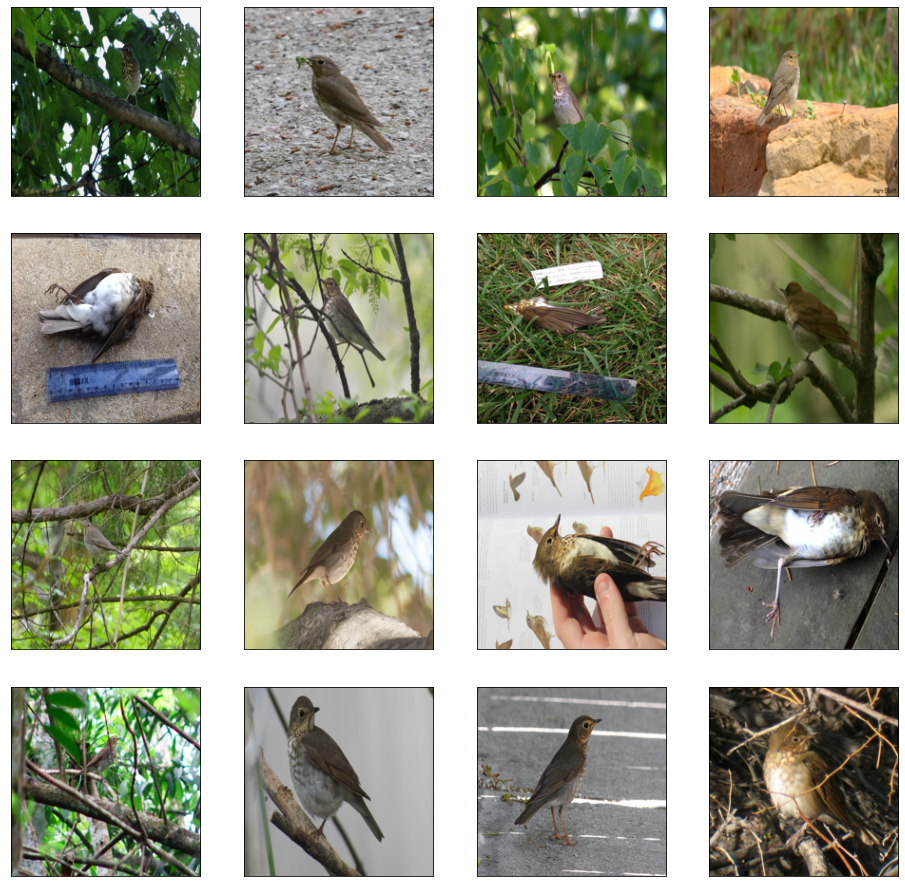

In [107]:
## code written by NAYU T.S

fig = plt.figure(figsize=(16, 16))
for i,im_path in enumerate(test_jpg[:16]):
    ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    im = Image.open(im_path)
    im = im.resize((200,200))
    plt.imshow(im)

In [113]:
## code from Utpal Rudra

#def get_first_category(img_id):
    #"""Find first the image category by id."""
    # get category id
    #category_id = test_images_df[test_images_df['id'] == img_id].category_id.values
    
    #return category_id

def visualize_image_grid(rows, cols):
    """Visualize random grid of images with the first category."""
    filenames = test_images_df['file_name']
    
    np.random.seed(42)
    img_idx = np.random.randint(len(filenames), size=rows * cols)
    
    fig, axs = plt.subplots(rows, cols, figsize=(25,16))
    
    for r in range(rows):
        for c in range(cols):
            # get the image and image id
            filename = filenames[img_idx[rows*r + c]]
            img_id = filename.split('.')[0]
            # get the category
            #category_id = get_first_category(img_id)

            
            img = Image.open(root_dir + filename)
            
            axs[r,c].imshow(img)
            axs[r,c].axis('off')
            #axs[r,c].set_title('{}'.format(category_id))
            
    plt.suptitle('Test Images', fontsize=16)
    plt.show()

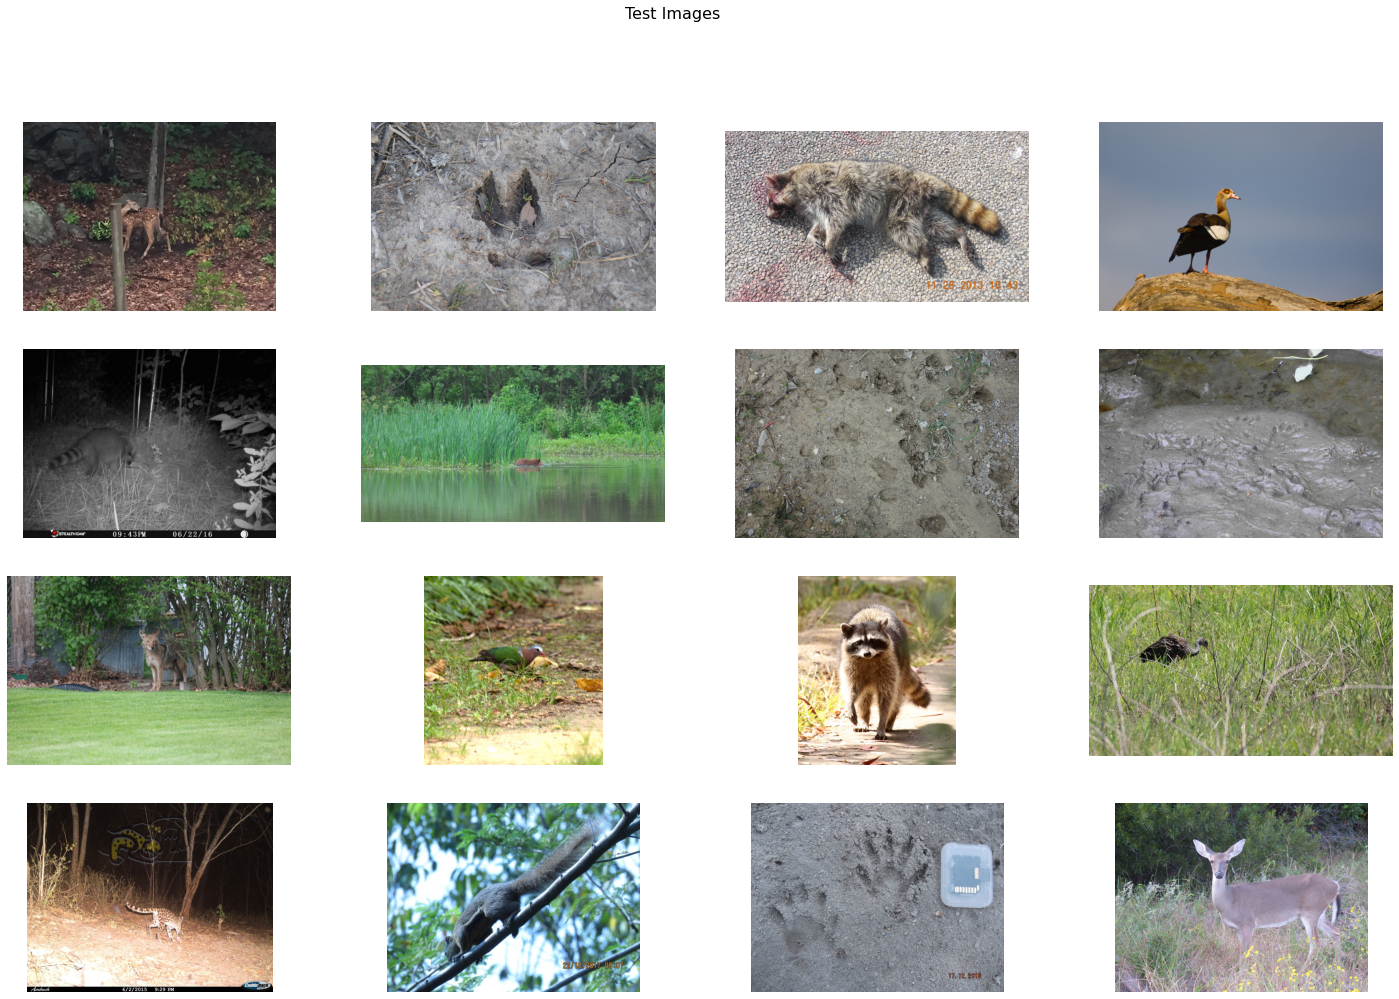

In [114]:
visualize_image_grid(4,4)